In [1]:
import json
from pathlib import Path

import numpy as np
import pandas as pd

from nbsnapshot import compare
from nbsnapshot.exceptions import SnapshotTestFailure

In [2]:
def create_fake_history(mean):
    """Creates a fake notebook history
    """
    history = [dict(metric=x) for x in np.random.normal(loc=mean, size=50)]
    _ = Path('constant.json').write_text(json.dumps(history))

def plot_history():
    """Plots records stored in notebook history
    """
    history = pd.read_json('constant.json')
    history['metric'].plot(kind='density')

Let's create a fake history to simulate that we ran a notebook 10 times. The fake cell will create random values drawn from a normal distribution centered at 10:

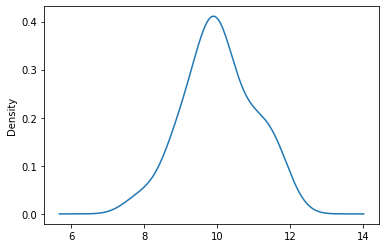

In [3]:
create_fake_history(mean=10)
plot_history()

Let's now run the sample notebook (`constant.ipynb`), this notebook only contains a cell that prints the number 10. Since this number is within the boundaries of our fake history, the test passes:

In [4]:
try:
    compare.main('constant.ipynb')
except SnapshotTestFailure as e:
    print(e)

Testing: 'metric' - OK!


Now, overwrite the existing history, replace it with a simulation of numbers drawn from a normal distribution centered at 0:

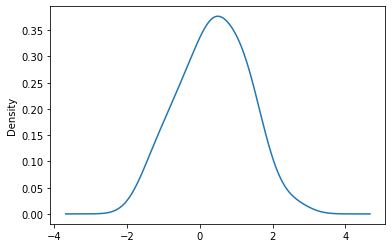

In [5]:
create_fake_history(mean=0)
plot_history()

Run the notebook again. This time, the value in the notebook (10) deviates too much from the history, hence, the test fails:

In [6]:
try:
    compare.main('constant.ipynb')
except SnapshotTestFailure as e:
    print(e)

Testing 'metric' - FAIL! Value is too high (10), expected one between -2.43 and 3.17
Some tests failed.
